In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras 

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score 

In [2]:
path="E:\\New folder\\Train"

In [3]:
height=128
width=128
batch_size=16
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
        path,
        validation_split=0.2,
        labels='inferred',
        subset='training',
        seed=123,
        label_mode='categorical',
        image_size=(height, width),
        batch_size=batch_size,
        shuffle=True)

Found 3240 files belonging to 4 classes.
Using 2592 files for training.


In [4]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
        path,
        validation_split=0.2,
        labels='inferred',
        subset='validation',
        seed=123,
        label_mode='categorical',
        image_size=(height, width),
        batch_size=batch_size,
        shuffle=True)

Found 3240 files belonging to 4 classes.
Using 648 files for validation.


In [5]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "E:\\New folder\\Test",
    labels='inferred',
    batch_size=16,
    image_size=(height, width),
    shuffle=False)

Found 1200 files belonging to 4 classes.


In [6]:
class_names=train_ds.class_names
print(class_names)

['Falciparum', 'Malarie', 'Ovale', 'Vivax']


In [7]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(height, width, 3),
                                                  pooling='avg',classes=4,
                                                  weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

In [8]:
resnet_model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
epochs=30
history=resnet_model.fit(train_ds,
                 validation_data=val_ds,
                 epochs=epochs,
                 batch_size=16,
                 shuffle=True
                )          

Epoch 1/30


162/162 [==============================] - 184s 1s/step - loss: 0.8302 - accuracy: 0.7639 - val_loss: 0.4061 - val_accuracy: 0.8380
Epoch 2/30
162/162 [==============================] - 165s 1s/step - loss: 0.2956 - accuracy: 0.8854 - val_loss: 0.3276 - val_accuracy: 0.8812
Epoch 3/30
162/162 [==============================] - 164s 1s/step - loss: 0.2648 - accuracy: 0.9059 - val_loss: 0.4485 - val_accuracy: 0.8519
Epoch 4/30
162/162 [==============================] - 180s 1s/step - loss: 0.1902 - accuracy: 0.9267 - val_loss: 0.3592 - val_accuracy: 0.8657
Epoch 5/30
162/162 [==============================] - 211s 1s/step - loss: 0.1741 - accuracy: 0.9348 - val_loss: 0.3579 - val_accuracy: 0.8735
Epoch 6/30
162/162 [==============================] - 173s 1s/step - loss: 0.1101 - accuracy: 0.9610 - val_loss: 0.2573 - val_accuracy: 0.8966
Epoch 7/30
162/162 [==============================] - 181s 1s/step - loss: 0.1148 - accuracy: 0.9587 - val_loss: 0.3231 - val_accuracy: 0.88

<Figure size 640x480 with 0 Axes>

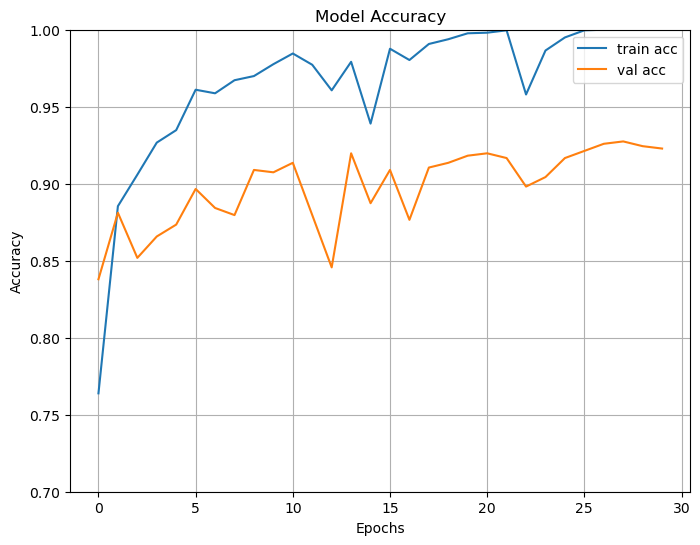

In [13]:
fig1 = plt.gcf()
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.axis(ymin=0.7, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.savefig("3_acc.jpg")
plt.show()

<Figure size 640x480 with 0 Axes>

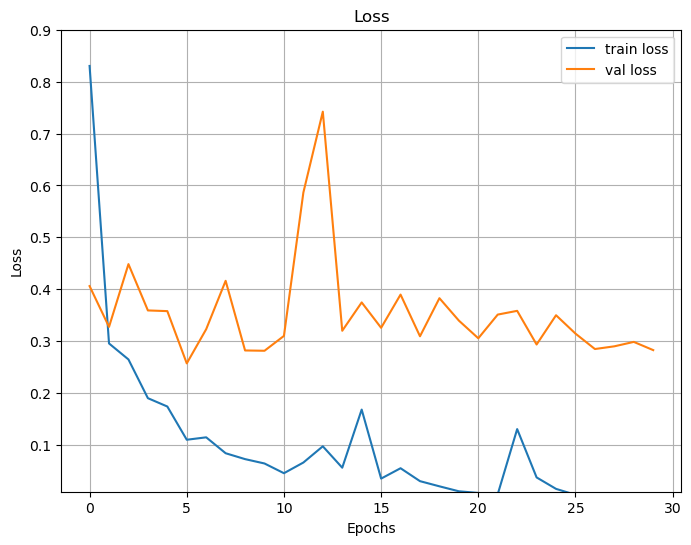

In [14]:
fig1 = plt.gcf()
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.axis(ymin=0.01, ymax=0.9)
plt.grid()
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.savefig("3_loss.jpg")
plt.show()

In [15]:
predictions =resnet_model.predict(test_dataset)

75/75 [==============================] - 65s 826ms/step


In [16]:
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

In [17]:
accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision=precision_score(true_labels, predicted_labels,average='micro')
conf_matrix = confusion_matrix(true_labels,predicted_labels) 
class_report = classification_report(true_labels,predicted_labels)

print("Accuracy:",accuracy)
print("Recall score:",recall)
print("F1 score:",f1)
print("Precision score:",precision)
print("Confusion matrix:\n",conf_matrix)
print("Class Report:\n",class_report)

Accuracy: 0.9466666666666667
Recall score: 0.9466666666666667
F1 score: 0.9459840541655831
Precision score: 0.9466666666666667
Confusion matrix:
 [[258  14  20   8]
 [  5 291   1   3]
 [  4   0 288   8]
 [  0   0   1 299]]
Class Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       300
           1       0.95      0.97      0.96       300
           2       0.93      0.96      0.94       300
           3       0.94      1.00      0.97       300

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



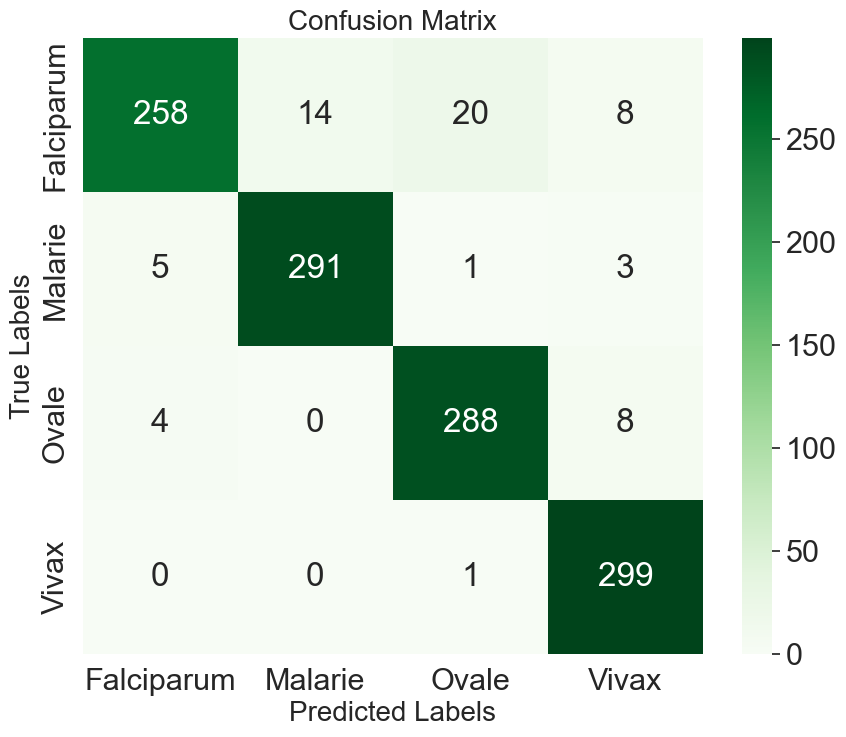

In [19]:
cm = confusion_matrix(true_labels, predicted_labels) 

plt.figure(figsize=(10,8))
ax=plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm,annot=True,fmt='g',cmap="Greens",ax=ax)

ax.set_xlabel("Predicted Labels",fontsize=20)
ax.set_ylabel("True Labels",fontsize=20)
ax.set_title("Confusion Matrix",fontsize=20)
ax.xaxis.set_ticklabels(['Falciparum','Malarie','Ovale','Vivax'])
ax.yaxis.set_ticklabels(['Falciparum','Malarie','Ovale','Vivax'])

plt.savefig("3_matrix.jpg")